In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('Income Data.csv')
df

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


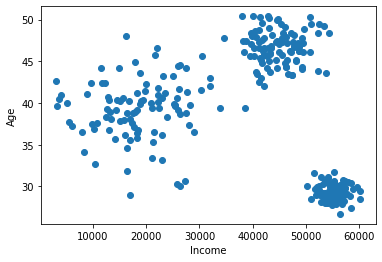

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['income'], df['age'])
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

In [4]:
k = KMeans(3)
k.fit(df[['income','age']])
df['Cluster'] = k.labels_
df

,income,age,Cluster
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1
...,...,...,...
295,38300.0,46.10,0
296,27400.0,44.15,1
297,54200.0,28.25,2
298,41800.0,44.85,0


In [5]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
# df4 = df[df.Cluster==3]

# plt.scatter(df1)
df1

,income,age,Cluster
0,41100.0,48.75,0
2,47800.0,46.75,0
7,39900.0,48.20,0
9,31900.0,43.05,0
13,46500.0,47.20,0
...,...,...,...
280,47700.0,46.80,0
294,46900.0,46.20,0
295,38300.0,46.10,0
298,41800.0,44.85,0


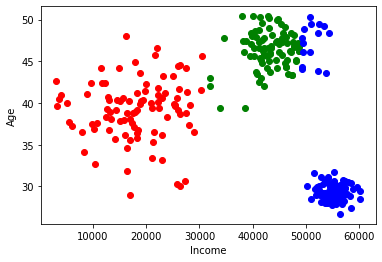

In [6]:
plt.scatter(df1.income, df1.age, color = 'green')
plt.scatter(df2.income, df2.age, color = 'red')
plt.scatter(df3.income, df3.age, color='blue')
# plt.scatter(df4.income, df4.age, color='black')

plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

Practical 7 test

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, Y = load_iris(return_X_y=True)
df=load_iris()
# df.shape()
xtrain = df.data[:129]
ytrain = df.target[:129]
xtest = df.data[129:]
ytest = df.target[129:]


In [8]:
model = SVC(kernel='linear', C=1.0)
model.fit(xtrain, ytrain)

SVC(kernel='linear')

In [9]:
ypred = model.predict(xtest)

In [10]:
from sklearn.metrics import classification_report
print("Classification Report : ", classification_report(ytest, ypred))

Classification Report :                precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.50      0.45      0.48        21
weighted avg       1.00      0.90      0.95        21



c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [11]:
GS  = GridSearchCV(SVC(), {'C':[1, 2, 3, 4], 'kernel' : ['linear', 'rbf', 'poly']})
GS.fit(xtrain, ytrain)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [12]:
GS.best_estimator_
from sklearn.metrics import confusion_matrix
# ypred1 = GS.predict(ytest)
print(GS.best_score_)
print("\n", confusion_matrix(ytest, ypred))

0.9843076923076923

 [[ 0  0]
 [ 2 19]]


# Practical 6 decision treeee classifier

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X, Y = load_iris(return_X_y=True)
xt, x_test,yt, y_test = train_test_split(X, Y, test_size=0.2)
ID3 = DecisionTreeClassifier(criterion='entropy', splitter="best")
ID3.fit(xt, yt)
ypred = ID3.predict(x_test)
print("Classification Report : ", classification_report(y_test, ypred))
print("Accuracy Score : ", accuracy_score(y_test, ypred))
print("Confusion Matrix : ", confusion_matrix(y_test, ypred))


Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score :  1.0
Confusion Matrix :  [[15  0  0]
 [ 0  8  0]
 [ 0  0  7]]


In [29]:
gini = DecisionTreeClassifier(criterion='gini', splitter="best")
gini.fit(xt, yt)
ypred = gini.predict(x_test)
print("Classification Report : ", classification_report(y_test, ypred))
print("Accuracy Score : ", accuracy_score(y_test, ypred))
print("Confusion Matrix : ", confusion_matrix(y_test, ypred))

Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score :  1.0
Confusion Matrix :  [[15  0  0]
 [ 0  8  0]
 [ 0  0  7]]


In [30]:
CART = DecisionTreeClassifier(splitter="best")
CART.fit(xt, yt)
ypred = CART.predict(x_test)
print("Classification Report : ", classification_report(y_test, ypred))
print("Accuracy Score : ", accuracy_score(y_test, ypred))
print("Confusion Matrix : ", confusion_matrix(y_test, ypred))

Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score :  1.0
Confusion Matrix :  [[15  0  0]
 [ 0  8  0]
 [ 0  0  7]]


# Practical 5 Naive bayes

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

data = load_boston()

df = pd.DataFrame(data.data, columns = data.feature_names)
X=np.ones((df.shape[0], df.shape[1]+1))


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
X[:, 1:] = df


In [5]:
scalar = StandardScaler()
scalar.fit(X[:, 1:])
X[:, 1:] = scalar.transform(X[:, 1:])


In [6]:
Xtrain = X[:400, :]
Xtest = X[400:, :]
y = data.target
Ytrain = y[:400]
Ytest = y[400:]

In [10]:
alpha = 0.001
iterations =10
reconst=10

theta = np.random.uniform(0, 10, Xtrain.shape[1])
update = np.zeros(Xtrain.shape[1])

In [11]:
for i in range(iterations):
    ypred = np.dot(Xtrain, theta)
    diff = ypred-Ytrain
    for j in range(Xtrain.shape[1]):
        update[j] = np.sum((diff*Xtrain.T)[j])
        theta[0]  = theta[0] - update[0]
        theta[1:] = theta[1:]*(1-alpha/Xtrain.shape[0])-update[1:]
        
print("Final thetas", theta)
    

Final thetas [-5.51530038e+42  5.12824727e+42 -9.93712521e+42  9.54877474e+42
  1.70014622e+42  7.98865687e+42 -3.88108545e+42  5.93351966e+42
 -5.39474923e+42  2.68049504e+42  2.40573059e+42  1.12949349e+42
 -4.32929003e+41  6.63038547e+41]


In [12]:
ytp = np.dot(Xtest,theta)